## Übungszettel 5: Clustering

## Maschinelles Lernen - WiSe 20/21

### Abgabe 11.12.2020, 12 Uhr

Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet**. Alle Lösungen sollen in _einem_ IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
Das IPython Notebook und ggf. zugehörige Dateien müssen in ein Ziparchiv gepackt werden und in Ilias hochgeladen werden. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben werden und Umlaute ggf. ersetzt werden.

### Aufgabe 1 - K-Means (2,5+0,5+0,5+2,5+2)

a) Wenden Sie in diesem Aufgabenteil das K-Means-Verfahren von Hand an. Es sind folgende Datenpunkte im euklidischen Raum gegeben:

| Punkt   | X     | Y     |
| :------ |------:|------:| 
| A       | 1.2   | 0.8   |
| B       | -0.6  | -1.3  |
| C       | -0.8  | 0.2   |
| D       | 0.2   | 0.3   |

Punkt A und C werden initial zu den Clusterzentroid C1, Punkte B und D initial zu den Clusterzentroid C2
zugeordnet.

Ermitteln sie die Minimal-Distanz-Partition unter der Anwendung des K-Means-Verfahrens und der euklidischen Distanz. Starten Sie, in dem Sie erst die jeweiligen Clusterschwerpunkte ermitteln.

![Rechenweg](./example.png)

b) Beschreiben Sie kurz wofür Silhouetten berechnet werden. 

 Für Interpretation und Validierung der Konsistenz innerhalb von Daten-Clustern und Auswärtung des Algorithmus

c) Was bedeuten negative Werte und was gibt der Silhouetten Koeffizient an? 

Eine Punktzahl von 1 bedeutet am besten, dass der Datenpunkt o innerhalb des Clusters, zu dem er gehört, sehr kompakt und weit von den anderen Clustern entfernt ist. Der schlechteste Wert ist -1. Werte nahe 0 kennzeichnen überlappende Cluster.

negative Werte bedeutet,dass die Anzahl von Cluster zu viele
oder zu wenig ist

Der Silhouettenkoeffizient gibt eine von der Cluster-Anzahl
unabhängige Maßzahl für die Qualität eines Clusterings an


d) Berechnen Sie den Silhouetten Koeffizienten für die Cluster aus Aufgabenteil a) von Hand. 

e) Lesen Sie die Datei `clustering.csv` ein und wenden Sie den K-Means Algorithmus jeweils für $k=\{2,3,6,10\}$ an. 
Führen Sie für jedes $k$ eine Silhouttenanalyse durch (Visualisierung). Wählen Sie schließlich ein geeignetes `k` und visualisieren Sie dafür das Ergebnis als Scatterplot, sodass erkennbar ist, welcher Punkt zu welchem Cluster gehört.Nutzen Sie `sklearn`

For n_clusters = 2 The average silhouette_score is : 0.46374410605723293
For n_clusters = 3 The average silhouette_score is : 0.5171385877102108
For n_clusters = 6 The average silhouette_score is : 0.6628734985774449
For n_clusters = 10 The average silhouette_score is : 0.516077242602303


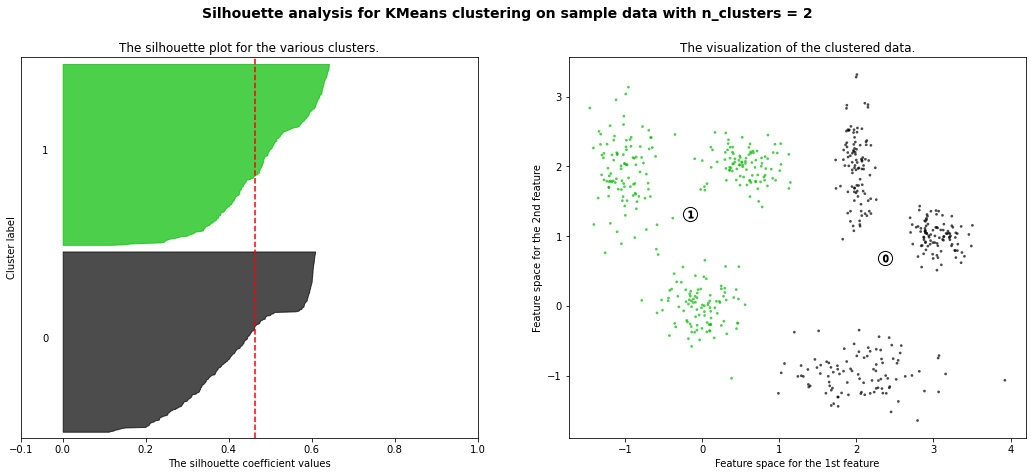

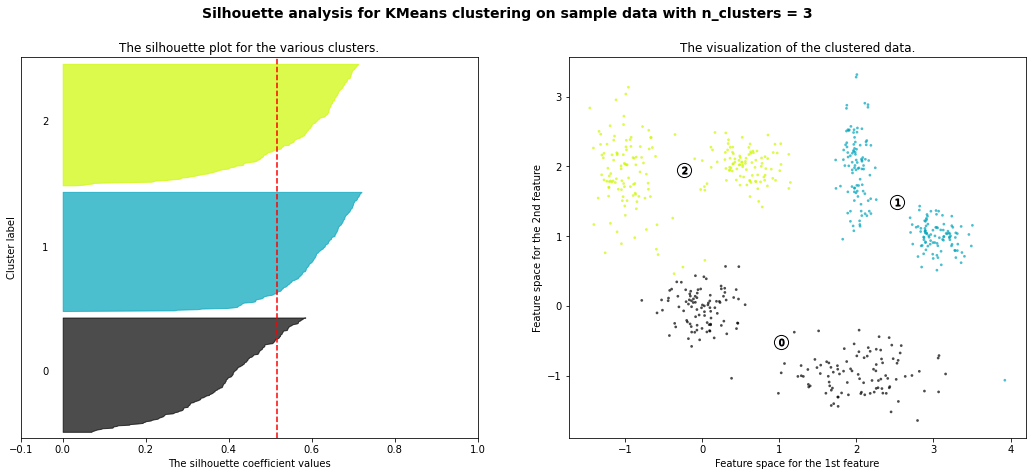

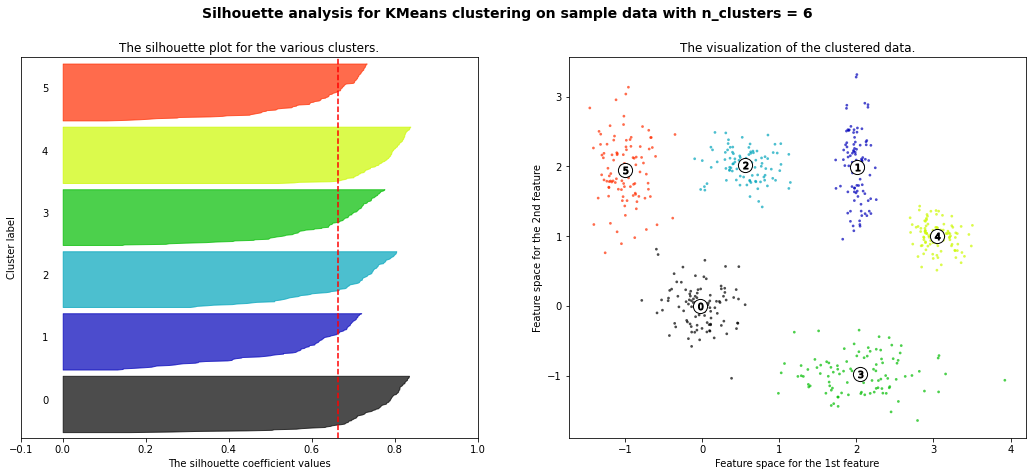

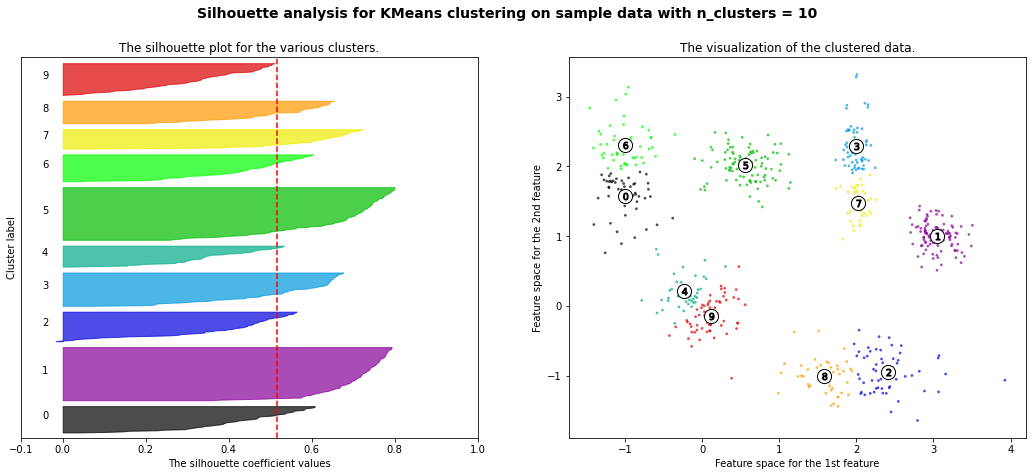

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

df = pd.read_csv('clustering.csv')
X = df.iloc[:, [0,1]].values

range_n_clusters = [2, 3, 6, 10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Aufgabe 2: Clustering (3+0,5+0,5+1,5+1,5)

a) Berechnen Sie ein Hierarchisches Clustering aus der folgenden Distanzmatrix mit der Methode
Average Linkage von Hand. Zeichnen Sie das entsprechende Dendrogramm. 

|        | A    | B    | C     | D     |
|--------|------|------|-------|-------|
| **A**  | 0    |      |       |       |
| **B**  | 4.438|0     |       |       |
| **C**  | 3.048|6.777 |0      |       |
| **D**  | 2.259|2.887 |4.339  |0      |


![Rechenweg](./example.png)

b) Wodurch unterscheiden sich partitionierende Verfahren von den hierarchischen Verfahren?

c) Erklären Sie *hard clustering* und *soft clustering*.

d) Laden sie den Inhalt der Datei `clustering.csv`. Wenden Sie das Clusteringverfahren Average Linkage darauf an. Visualisieren Sie das Dendrogramm. Verwenden Sie `sklearn`.

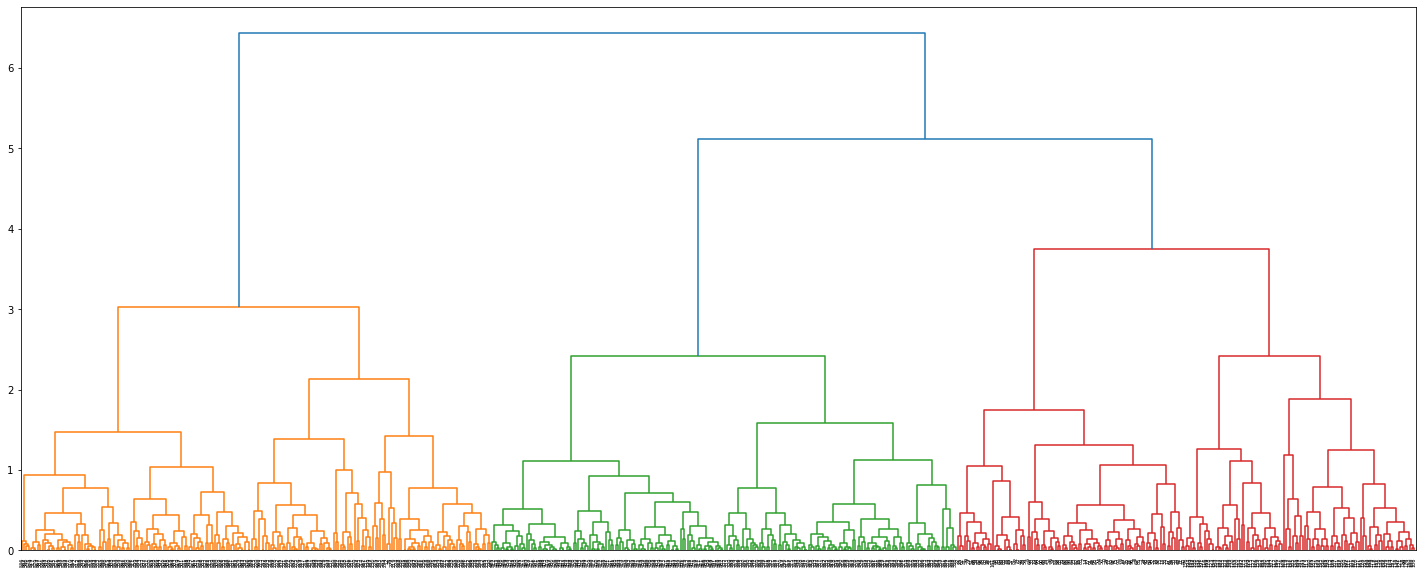

In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd

df = pd.read_csv('clustering.csv')
X = df.iloc[:, [0,1]].values

def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

model = AgglomerativeClustering(linkage="ward")
model.fit(X)

distance, weight = get_distances(X,model)
linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)
plt.figure(figsize=(25,10))
dendrogram(linkage_matrix)
plt.show()

e) Wenden Sie das Clusteringverfahren Average Linkage auf die Daten aus d) an. Wählen Sie eine geeignte Anzahl von Clustern. Visualisieren Sie das Ergebnis, sodass erkennbar ist, welcher Punkt zu welchem Cluster gehört. 
Verwenden Sie `sklearn`.

<Figure size 1440x720 with 0 Axes>